#### iris 데이터셋 활용해서 꽃잎 너비 예측 모델
 - 데이터셋 : iris.csv에서 2개의 Feature 사용
 - 구현프레임워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [447]:
# 모듈 로딩
import torch                        # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               # 인공신경망 관련 모듈
import torch.nn.functional as F        # 손실, 거래 등 함수 관련 모듈 
import torch.optim as optimizer     # 최적화 기법 관련 모듈
import pandas as pd
from sklearn.model_selection import  train_test_split

In [448]:
# [1-1] 데이터 로딩
irisDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\TORCH_DL\data\iris.csv',usecols=[0,1,2,3])
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[2] 모델 준비
 - 학습방법 : 지도학습 > 회귀
 - 알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [449]:
torch.manual_seed(1)

In [450]:
# in_features : petal.length    3개
# out_feature : petal.width     1개
model = nn.Linear(3,1)

In [451]:
# 가중치와 절편 확인
for name, name_parameter in model.named_parameters() :
    print(f'[{name}], [{name_parameter}],"\n"')

[weight], [Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True)],"
"
[bias], [Parameter containing:
tensor([0.2710], requires_grad=True)],"
"


[3] 최적화 인스턴스 준비

In [452]:
### 모델의 가중치와 절편 최적화 이후 인스턴스에 전달
adam_optimizer = optimizer.Adam(model.parameters(), lr=0.1)

[4] 학습 진행

 - [4-1] 데이터셋 Tensor화 진행 : 데이터 준비 시 진행 or 학습 전 진행

In [453]:
irisDF.columns[:-1]

Index(['sepal.length', 'sepal.width', 'petal.length'], dtype='object')

In [454]:
featureTS = torch.from_numpy(irisDF[irisDF.columns[:-1]].values).float()
featureTS.shape

torch.Size([150, 3])

In [455]:
targetTS = torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

In [456]:
# Train, Test
X_train, X_test, y_train, y_test = train_test_split(featureTS,targetTS,
                                                   test_size = 0.2)

# Train, Valid
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                   test_size = 0.2)

- [4-2] 학습진행 : 
   * 학습횟수 결정 ==> 에포크 설정
   * 학습결과 저장 ==> 손실저장 변수 설정

In [457]:
EPOCH = 100

In [458]:
# 모델 테스트/검증 함수 
# ==> 가중치,절편 업데이트 X 그래서 최적화 미진행 해야함
# ==> 현재 가중치와 절편으로 테스트 진행
def testing(testTS, targetTS, kind = 'Val') :

    with torch.no_grad() :      # 가중치 및 절편 업데이트 X
        # (1) 학습진행 forward
        pre_y = model(testTS)

        # (2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
       
        # (3) 학습 과정 출력
        print(f'[{kind}] LOSS : {loss}')

    return loss


In [459]:
# 모델 학습 함수
def training(featureTS, targetTS, valTS, valTargetTS) :
    
    loss_history = [[],[]]

    for epoch in range(EPOCH) : 
        # (1) 학습진행 forward
        pre_y = model(featureTS)

        # (2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        loss_history[0].append(loss.item())
       
        # (3) 최적화 - 가중치, 절편 업데이트
        adam_optimizer.zero_grad()
        loss.backward()
        adam_optimizer.step()

        val_loss = testing(valTS,valTargetTS)
        loss_history[1].append(val_loss.item())


        # (4) 학습 과정 출력
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [460]:
# 모델 학습 진행
loss = training(X_train,y_train,X_val,y_val)

[Val] LOSS : 0.9134621024131775
[0/100] LOSS : 0.6023434996604919
[Val] LOSS : 0.3826148808002472
[1/100] LOSS : 1.2888065576553345
[Val] LOSS : 0.5390672087669373
[2/100] LOSS : 0.5389247536659241
[Val] LOSS : 0.9739119410514832
[3/100] LOSS : 0.4006403982639313
[Val] LOSS : 0.7902092933654785
[4/100] LOSS : 0.6827318668365479
[Val] LOSS : 0.36110588908195496
[5/100] LOSS : 0.5439260601997375
[Val] LOSS : 0.17990504205226898
[6/100] LOSS : 0.2542695999145508
[Val] LOSS : 0.2369699627161026
[7/100] LOSS : 0.21212221682071686
[Val] LOSS : 0.24086415767669678
[8/100] LOSS : 0.3463667333126068
[Val] LOSS : 0.1466463804244995
[9/100] LOSS : 0.35259756445884705
[Val] LOSS : 0.1197139248251915
[10/100] LOSS : 0.2076997011899948
[Val] LOSS : 0.22629870474338531
[11/100] LOSS : 0.10622254759073257
[Val] LOSS : 0.3310014009475708
[12/100] LOSS : 0.14594291150569916
[Val] LOSS : 0.29840049147605896
[13/100] LOSS : 0.21966241300106049
[Val] LOSS : 0.17227929830551147
[14/100] LOSS : 0.20080523192

In [461]:
loss

[[0.6023434996604919,
  1.2888065576553345,
  0.5389247536659241,
  0.4006403982639313,
  0.6827318668365479,
  0.5439260601997375,
  0.2542695999145508,
  0.21212221682071686,
  0.3463667333126068,
  0.35259756445884705,
  0.2076997011899948,
  0.10622254759073257,
  0.14594291150569916,
  0.21966241300106049,
  0.20080523192882538,
  0.11948293447494507,
  0.08483162522315979,
  0.1268869787454605,
  0.1693085879087448,
  0.15068411827087402,
  0.10446575284004211,
  0.09547653794288635,
  0.12735722959041595,
  0.14677582681179047,
  0.12657947838306427,
  0.09888667613267899,
  0.10033098608255386,
  0.12006929516792297,
  0.12249663472175598,
  0.10255128145217896,
  0.08811952918767929,
  0.09441118687391281,
  0.1036742702126503,
  0.09679430723190308,
  0.08232947438955307,
  0.07925749570131302,
  0.08649616688489914,
  0.08766800165176392,
  0.07900979369878769,
  0.07326944917440414,
  0.07690604776144028,
  0.08068808168172836,
  0.07697834819555283,
  0.07184659689664841,


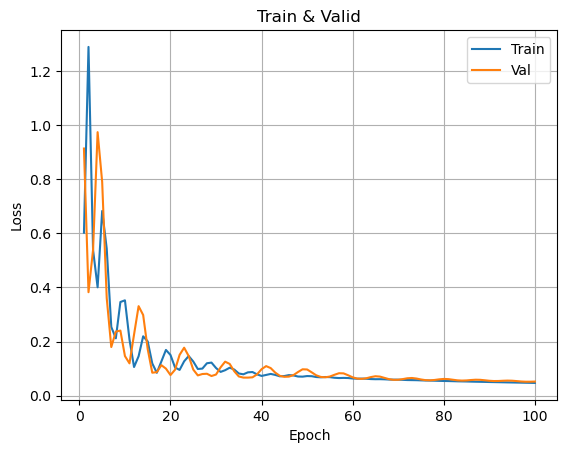

In [462]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(1,101),loss[0], label='Train')
plt.plot(range(1,101),loss[1], label='Val')
plt.title('Train & Valid')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()